In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("superstore.xlsx")

df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#Data Cleaning

df.isnull().sum()

df.fillna(0, inplace=True)    

#No major missing values found. Dataset is clean and usable for analysis.


In [6]:
#Remove Duplicates

df.duplicated().sum()
df.drop_duplicates(inplace=True)

#Duplicate records removed to avoid double counting of sales and profit.

In [7]:
#Date Conversion

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.month_name()

df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

#Created new time-based features to analyze sales trends and calculated profit margin to evaluate business efficiency.


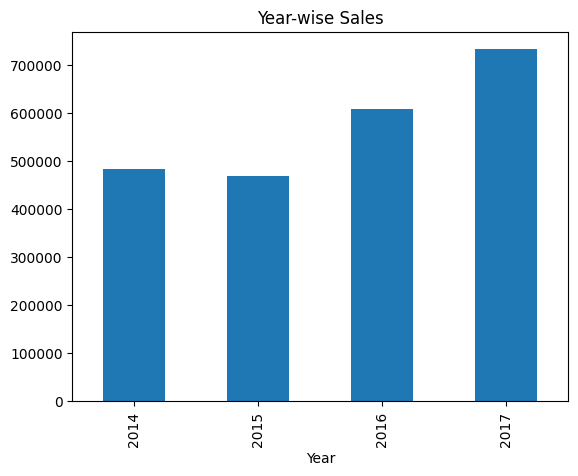

In [8]:
#Year wise sales Trends
year_sales = df.groupby('Year')['Sales'].sum()

plt.figure()
year_sales.plot(kind='bar')
plt.title("Year-wise Sales")
plt.show()

#Sales show a consistent growth trend over the years, indicating expanding business performance.

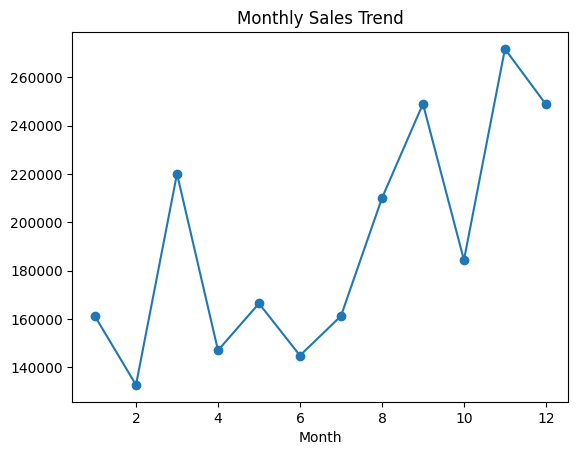

In [9]:
#Monthly Sales Trends

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.show()

#Sales peak during year-end months, suggesting seasonal demand spikes.

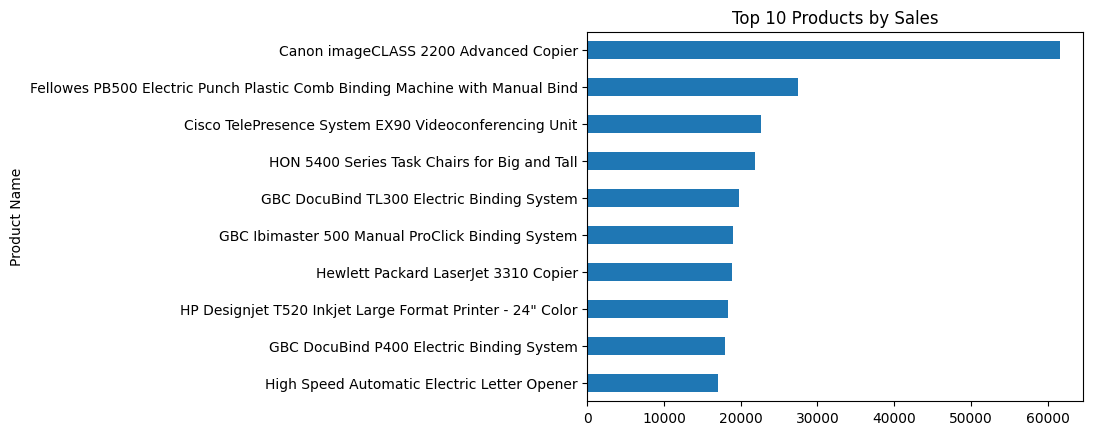

In [10]:
#Top 10 Products by Sales

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Products by Sales")
plt.show()
 #Few products contribute significantly to revenue — focusing marketing efforts on these can maximize returns.

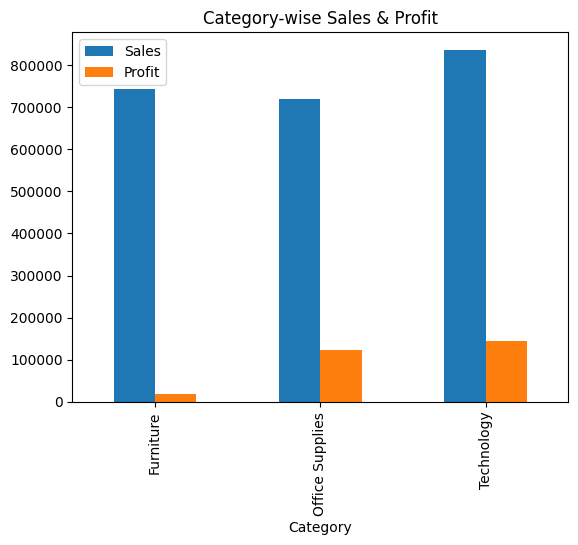

In [11]:
# Category wise Sales and Profit
category_data = df.groupby('Category')[['Sales','Profit']].sum()

category_data.plot(kind='bar')
plt.title("Category-wise Sales & Profit")
plt.show()

#Technology category generates highest profit, while Furniture shows lower profitability despite high sales.

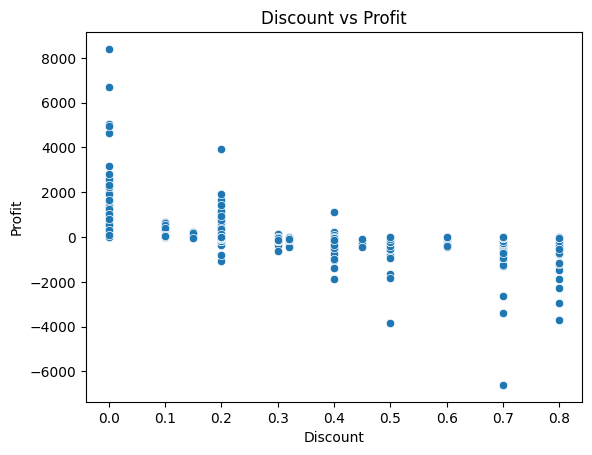

In [12]:
# Discount Vs Profit Relationship

plt.figure()
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

#Higher discounts negatively impact profit margins. Heavy discounting strategy should be optimized.

In [13]:
#Loss Making Products

loss_products = df[df['Profit'] < 0]

loss_products.groupby('Product Name')['Profit'].sum().sort_values().head(10)

#Certain products consistently generate losses — pricing strategy or supplier negotiation needs review.

Product Name
Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
GBC DocuBind P400 Electric Binding System                                     -6859.3896
Lexmark MX611dhe Monochrome Laser Printer                                     -5269.9690
GBC Ibimaster 500 Manual ProClick Binding System                              -5098.5660
GBC DocuBind TL300 Electric Binding System                                    -4162.0336
Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -3431.6730
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                      -3107.5272
Ibico EPK-21 Electric Binding System                                          -2929.4845
Bush Advantage Collection Racetrack Conference Table                          -2545.2600
Name: Profit, dtype: float64

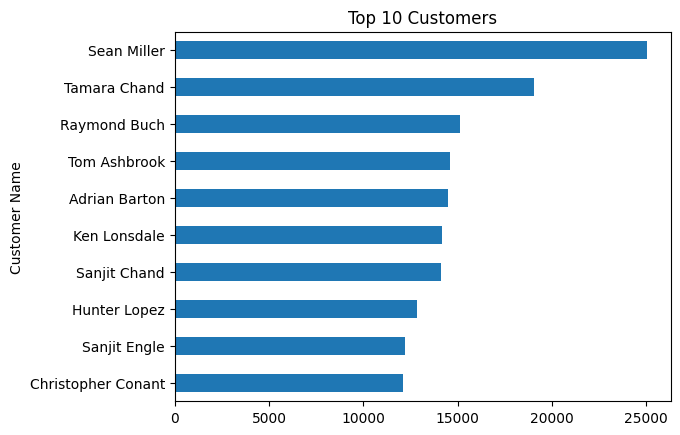

In [14]:
#Customer Analysis

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Customers")
plt.show()


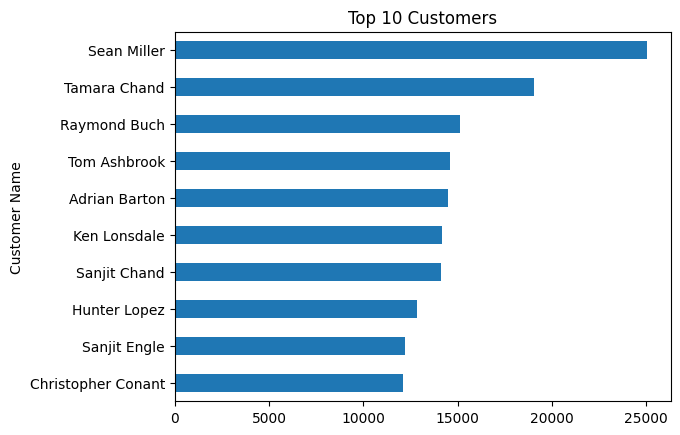

In [15]:
#Sub Category Profit

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Customers")
plt.show()


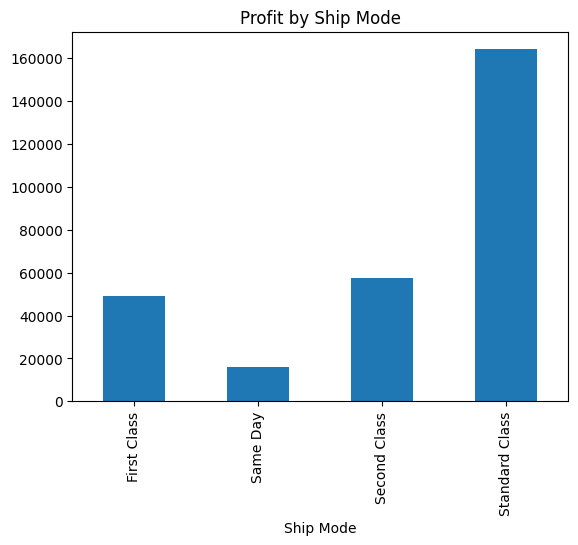

In [16]:
#Ship Mode Analysis

ship_mode = df.groupby('Ship Mode')['Profit'].sum()

plt.figure()
ship_mode.plot(kind='bar')
plt.title("Profit by Ship Mode")
plt.show()

#Standard shipping contributes stable profit, while expedited shipping might increase operational costs.